In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [2]:
fb_data = pd.read_csv("data/angle_full_body.csv")
#fb_data = pd.read_csv('data/imputed_full_body.csv')

In [3]:
fb_data.duplicated().sum()

70

In [4]:
fb_data = fb_data.drop_duplicates()

In [5]:
inertia_values = []
silhouette_values = [0]
calinski_harabasz_values = [0]

for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(fb_data)
    
    inertia_values.append(kmeans.inertia_)
    if(i > 1):
        silhouette_values.append( silhouette_score(fb_data, kmeans.labels_) )
        calinski_harabasz_values.append( calinski_harabasz_score(fb_data, kmeans.labels_) )

/home/webis/miniconda3/envs/pifpaf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/webis/miniconda3/envs/pifpaf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/webis/miniconda3/envs/pifpaf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/webis/miniconda3/envs/pifpaf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The 

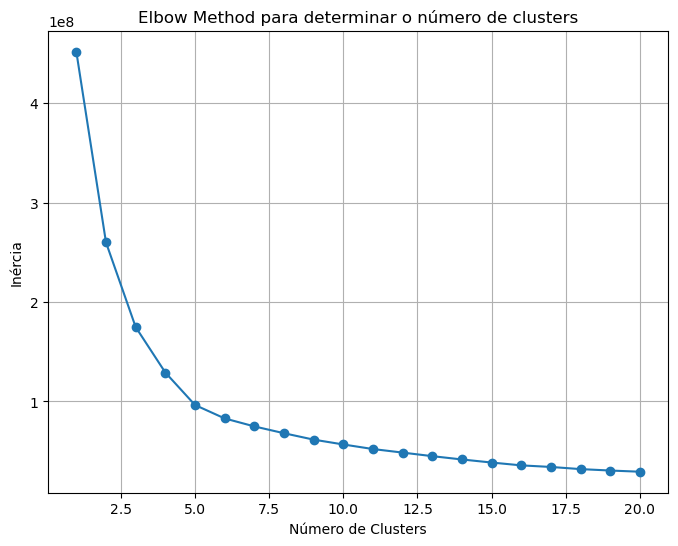

In [6]:
# Plotar o gráfico da inércia em relação ao número de clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 21), inertia_values, marker='o')
plt.grid()
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Elbow Method para determinar o número de clusters')
plt.show()

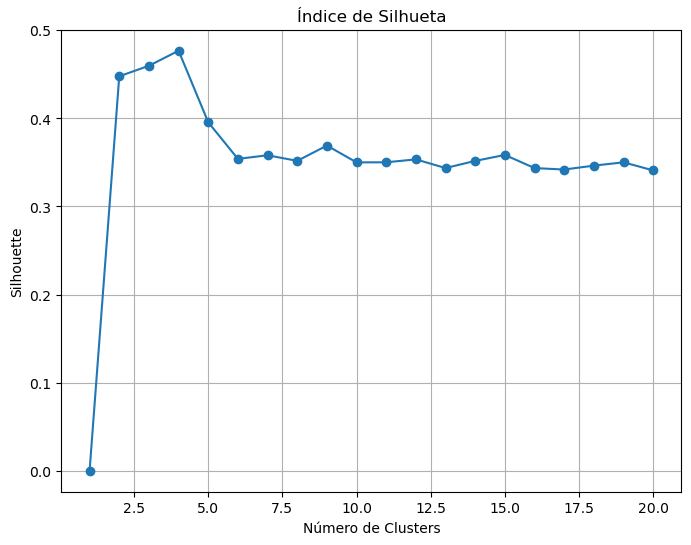

In [7]:
# Plotar o gráfico da silhueta em relação ao número de clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 21), silhouette_values, marker='o')
plt.grid()
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette')
plt.title('Índice de Silhueta')
plt.show()

In [8]:
arr = np.array(silhouette_values)
indexed_arr = list(enumerate(arr))
sorted_arr = sorted(indexed_arr, key=lambda x: x[1], reverse=True)
for index, value in sorted_arr:
    print(f"K: {index+1}, Value: {value}")

K: 4, Value: 0.4768481181756998
K: 3, Value: 0.45973841034024987
K: 2, Value: 0.44782173651546836
K: 5, Value: 0.39560416371086254
K: 9, Value: 0.3691830299641665
K: 15, Value: 0.3585215544723384
K: 7, Value: 0.3581491054315289
K: 6, Value: 0.35404622175435885
K: 12, Value: 0.35347008952638115
K: 8, Value: 0.3518017678840785
K: 14, Value: 0.3517883204320412
K: 11, Value: 0.35018435727109
K: 19, Value: 0.35013313884635006
K: 10, Value: 0.3500692370633253
K: 18, Value: 0.3464012814685933
K: 13, Value: 0.34364365350170256
K: 16, Value: 0.34359497323649574
K: 17, Value: 0.34195314658068476
K: 20, Value: 0.3409809345508816
K: 1, Value: 0.0


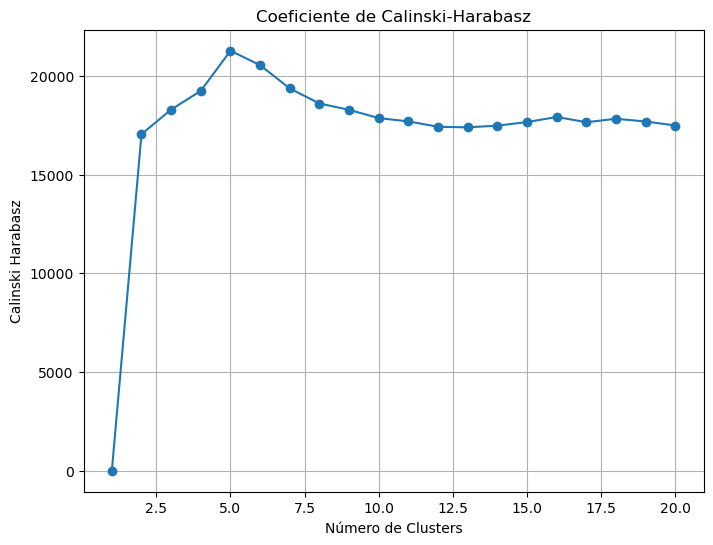

In [9]:
# Plotar o gráfico da métrica calinski em relação ao número de clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 21), calinski_harabasz_values, marker='o')
plt.grid()
plt.xlabel('Número de Clusters')
plt.ylabel('Calinski Harabasz')
plt.title('Coeficiente de Calinski-Harabasz')
plt.show()

In [10]:
arr = np.array(calinski_harabasz_values)
indexed_arr = list(enumerate(arr))
sorted_arr = sorted(indexed_arr, key=lambda x: x[1], reverse=True)
for index, value in sorted_arr:
    print(f"K: {index+1}, Value: {value}")

K: 5, Value: 21269.648243296866
K: 6, Value: 20536.340234831652
K: 7, Value: 19357.55667190986
K: 4, Value: 19237.59549848879
K: 8, Value: 18596.354952700523
K: 3, Value: 18291.15697231979
K: 9, Value: 18275.987908574265
K: 16, Value: 17914.50381511655
K: 10, Value: 17855.964741215965
K: 18, Value: 17823.990269535356
K: 11, Value: 17690.978581865056
K: 19, Value: 17682.906555623034
K: 15, Value: 17657.33823287258
K: 17, Value: 17649.069505026386
K: 20, Value: 17482.727259484996
K: 14, Value: 17476.111321275268
K: 12, Value: 17417.21517440083
K: 13, Value: 17390.01227256923
K: 2, Value: 17041.55561738309
K: 1, Value: 0.0
